1. Найти данные для классификации. Данные в группе повторяться не
должны! Предобработать данные, если это необходимо.

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.datasets import fetch_openml

In [38]:
data = fetch_openml(name='visualizing_galaxy', version=2)
df = pd.DataFrame(data.frame)
df 

,eastwest,northsouth,angle,radialposition,binaryClass
0,8.462789,-38.173172,102.5,39.099998,N
1,7.964978,-35.927692,102.5,36.799999,N
2,7.467167,-33.682213,102.5,34.500001,N
3,6.969356,-31.436731,102.5,32.200000,N
4,6.471544,-29.191250,102.5,29.899999,N
...,...,...,...,...,...
318,-9.090464,41.004433,102.5,-42.000000,P
319,-9.588275,43.249912,102.5,-44.299999,P
320,-10.042798,45.300137,102.5,-46.400002,P
321,-10.540609,47.545616,102.5,-48.700001,P


In [39]:
df['binaryClass'] = df['binaryClass'].apply(lambda x: 1 if x=='N' else 0)

In [40]:
df

,eastwest,northsouth,angle,radialposition,binaryClass
0,8.462789,-38.173172,102.5,39.099998,1
1,7.964978,-35.927692,102.5,36.799999,1
2,7.467167,-33.682213,102.5,34.500001,1
3,6.969356,-31.436731,102.5,32.200000,1
4,6.471544,-29.191250,102.5,29.899999,1
...,...,...,...,...,...
318,-9.090464,41.004433,102.5,-42.000000,0
319,-9.588275,43.249912,102.5,-44.299999,0
320,-10.042798,45.300137,102.5,-46.400002,0
321,-10.540609,47.545616,102.5,-48.700001,0


In [41]:
df.isna().sum()

eastwest          0
northsouth        0
angle             0
radialposition    0
binaryClass       0
dtype: int64

In [42]:
df.describe()

,eastwest,northsouth,angle,radialposition
count,323.000000,323.000000,323.000000,323.000000
mean,-0.332369,1.521089,80.890093,-0.842724
std,12.027505,22.887763,38.244305,25.888799
min,-29.666929,-49.107689,12.500000,-52.400002
25%,-7.916875,-13.554341,63.500000,-21.350000
50%,-0.064932,0.670963,92.500000,-0.800000
75%,6.950529,18.013731,102.500000,19.649999
max,29.484140,49.888725,133.000000,55.699999


2. Изобразить гистограмму, которая показывает баланс классов. Сделать
выводы.



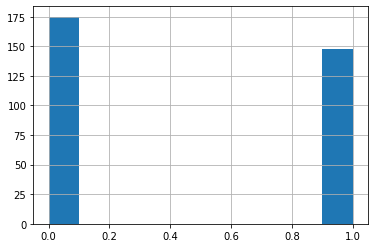

In [44]:
df['binaryClass'].hist()

3. Разбить выборку на тренировочную и тестовую. Тренировочная для
обучения модели, тестовая для проверки ее качества.


In [45]:
from sklearn.model_selection import train_test_split
X = df.drop('binaryClass', axis=1)
Y = df['binaryClass']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [46]:
X_train

,eastwest,northsouth,angle,radialposition
100,14.263044,-37.156502,111.0,39.800001
179,0.872388,-19.980965,92.5,20.000000
14,1.471789,-6.638813,102.5,6.800000
127,-8.027442,20.912201,111.0,-22.399999
71,8.115780,-8.703109,133.0,11.899999
...,...,...,...,...
242,-12.225820,-24.521202,63.5,-27.400000
244,-14.278330,-28.637899,63.5,-32.000000
96,18.420113,-47.986034,111.0,51.400000
43,9.860590,2.186040,12.5,10.100000


In [47]:
Y_train

100    1
179    1
14     1
127    0
71     1
      ..
242    1
244    1
96     1
43     1
4      1
Name: binaryClass, Length: 242, dtype: category
Categories (2, int64): [0, 1]

4. Применить алгоритмы классификации: логистическая регрессия, SVM,
KNN. Построить матрицу ошибок по результатам работы моделей
(использовать confusion_matrix из sklearn.metrics).

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [49]:
%%time
logreg_model = LogisticRegression().fit(X_train, Y_train)

CPU times: user 15.5 ms, sys: 2.07 ms, total: 17.5 ms
Wall time: 17.6 ms


In [50]:
%%time
svm_model = SVC(kernel='linear').fit(X_train, Y_train)

CPU times: user 15 ms, sys: 698 µs, total: 15.7 ms
Wall time: 14.5 ms


In [51]:
%%time
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)

CPU times: user 3.11 ms, sys: 0 ns, total: 3.11 ms
Wall time: 3.09 ms


In [52]:
Y_test.value_counts()

0    52
1    29
Name: binaryClass, dtype: int64

In [53]:
print(confusion_matrix(Y_test, logreg_model.predict(X_test)))

[[49  3]
 [ 2 27]]


In [54]:
print(confusion_matrix(Y_test, svm_model.predict(X_test)))

[[49  3]
 [ 1 28]]


In [55]:
print(confusion_matrix(Y_test, knn.predict(X_test)))

[[46  6]
 [ 1 28]]


5. Сравнить результаты классификации, используя accuracy, precision,
recall и f1-меру (можно использовать classification_report из
sklearn.metrics). Также сравнить время работы алгоритмов. Сделать
выводы.

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(Y_test, logreg_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.92        29

    accuracy                           0.94        81
   macro avg       0.93      0.94      0.93        81
weighted avg       0.94      0.94      0.94        81



In [58]:
print(classification_report(Y_test, svm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.90      0.97      0.93        29

    accuracy                           0.95        81
   macro avg       0.94      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81



In [59]:
print(classification_report(Y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        52
           1       0.82      0.97      0.89        29

    accuracy                           0.91        81
   macro avg       0.90      0.93      0.91        81
weighted avg       0.92      0.91      0.91        81

